In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
# Các đường dẫn đến file CSV
paths = [
    "/kaggle/input/evaluate-stargan-graph/stargan_eval_results_master.csv",
    "/kaggle/input/evaluate-stargan-graph-2/stargan_eval_results_master.csv",
    "/kaggle/input/evaluate-stargan-graph-3/stargan_eval_results_master.csv",
    "/kaggle/input/evaluate-stargan-graph-4/stargan_eval_results_master.csv",
    "/kaggle/input/evaluate-stargan-graph-5/stargan_eval_results_master.csv",
]

dfs = []
for p in paths:
    if os.path.exists(p):
        dfs.append(pd.read_csv(p))
    else:
        print("Không tìm thấy:", p)

# Gộp toàn bộ dữ liệu
df = pd.concat(dfs, ignore_index=True)

# Sort theo checkpoint
df = df.sort_values("checkpoint").reset_index(drop=True)

print("Tổng số dòng:", len(df))
df.head()


Tổng số dòng: 13


,checkpoint,mean_ssim,mean_fid,ssim_1,fid_1,ssim_2,fid_2,ssim_3,fid_3,ssim_4,...,ssim_13,fid_13,ssim_14,fid_14,ssim_15,fid_15,ssim_16,fid_16,ssim_17,fid_17
0,50000,0.714509,111.139389,0.697697,120.120098,0.712600,103.974928,0.703433,112.934047,0.677887,...,0.735982,74.831233,0.684710,177.800072,0.717159,105.905272,0.733583,79.644528,0.735107,87.234707
1,100000,0.735570,85.948648,0.711831,101.556460,0.734815,77.936776,0.711037,88.658980,0.703243,...,0.745963,65.013584,0.716428,101.327677,0.735234,90.784789,0.755700,58.436008,0.754920,67.352130
2,150000,0.752122,75.498754,0.729030,91.150308,0.750921,75.350881,0.720300,87.095178,0.716841,...,0.751831,57.255119,0.738954,95.347792,0.749507,81.812536,0.770883,51.235306,0.769419,63.451921
3,200000,0.736212,79.423372,0.706354,90.900063,0.735874,79.097436,0.711126,85.417413,0.699527,...,0.733375,64.901015,0.701758,117.610319,0.738508,79.626601,0.761877,50.956836,0.756973,69.356299
4,250000,0.753016,66.770239,0.723622,81.163398,0.760651,59.617224,0.747391,75.585317,0.710198,...,0.741353,54.356421,0.747265,80.942036,0.747843,76.904553,0.774289,47.884872,0.771235,63.266148


In [3]:
criteria_names = [
    "Hói Đầu",               # Bald
    "Tóc Mái",               # Bangs
    "Tóc Đen",               # Black Hair
    "Tóc Vàng",              # Blond Hair
    "Mũm Mĩm",               # Chubby
    "Đeo Kính",              # Eyeglasses
    "Râu Dê",                # Goatee
    "Tóc Bạc",               # Gray Hair
    "Trang Điểm Đậm",        # Heavy Makeup
    "Nam Giới",              # Male
    "Miệng Hơi Mở",          # Mouth Slightly Open
    "Râu Mép",               # Mustache
    "Không Râu",             # No Beard
    "Da Nhợt Nhạt",          # Pale Skin
    "Má Hồng",               # Rosy Cheeks
    "Mỉm Cười",              # Smiling
    "Đánh Son"               # Wearing Lipstick
]


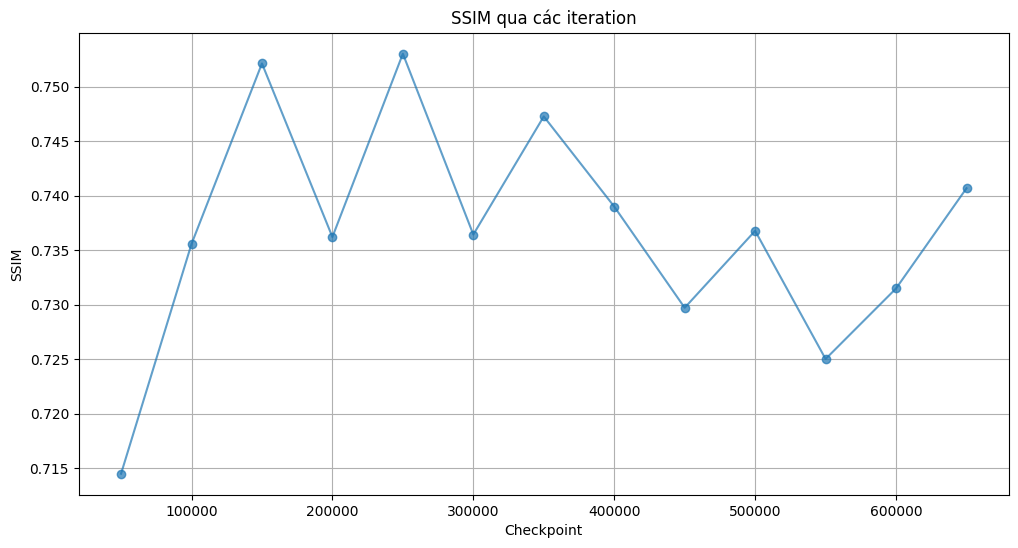

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df["checkpoint"], df["mean_ssim"], marker='o', alpha=0.7)
plt.title("SSIM qua các iteration")
plt.xlabel("Checkpoint")
plt.ylabel("SSIM")
plt.grid(True)
plt.show()


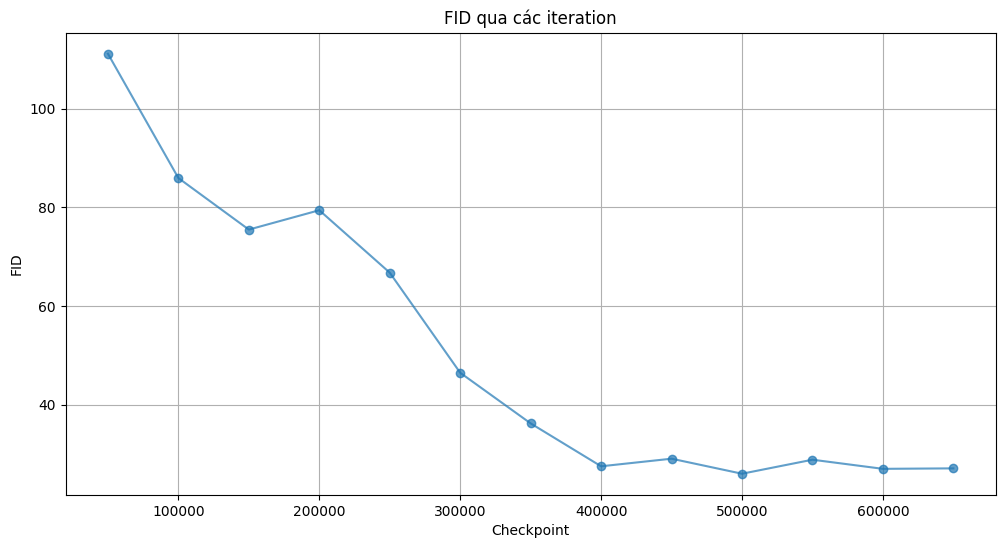

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df["checkpoint"], df["mean_fid"], marker='o', alpha=0.7)
plt.title("FID qua các iteration")
plt.xlabel("Checkpoint")
plt.ylabel("FID")
plt.grid(True)
plt.show()


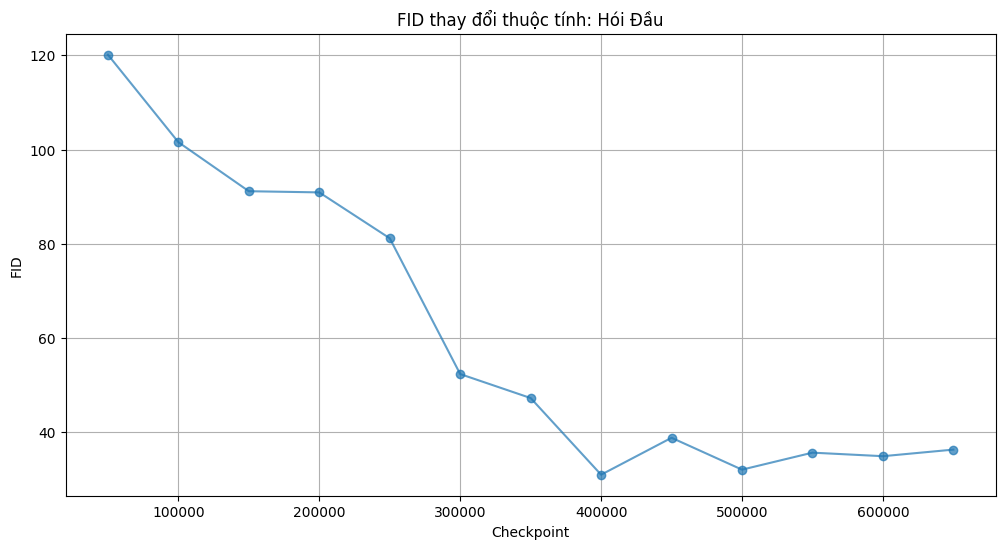

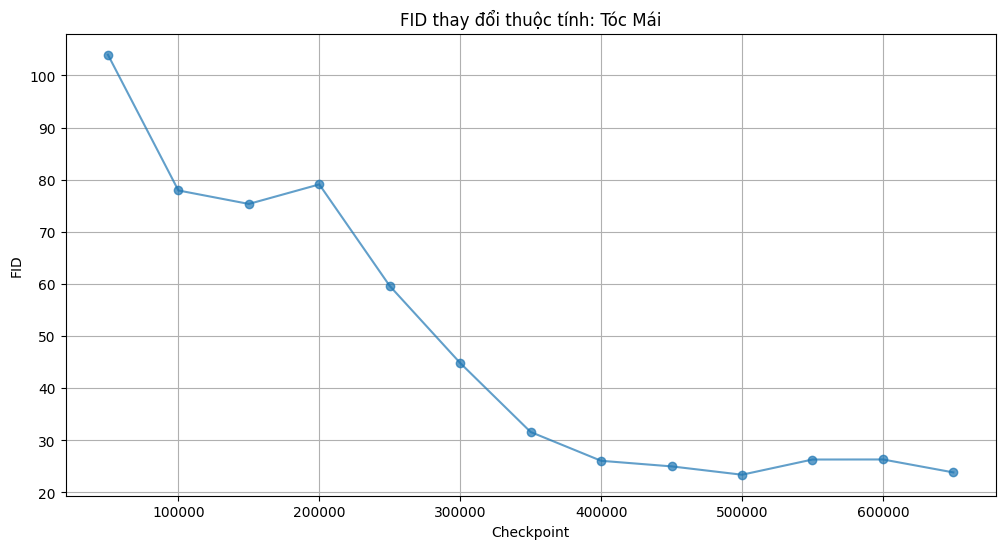

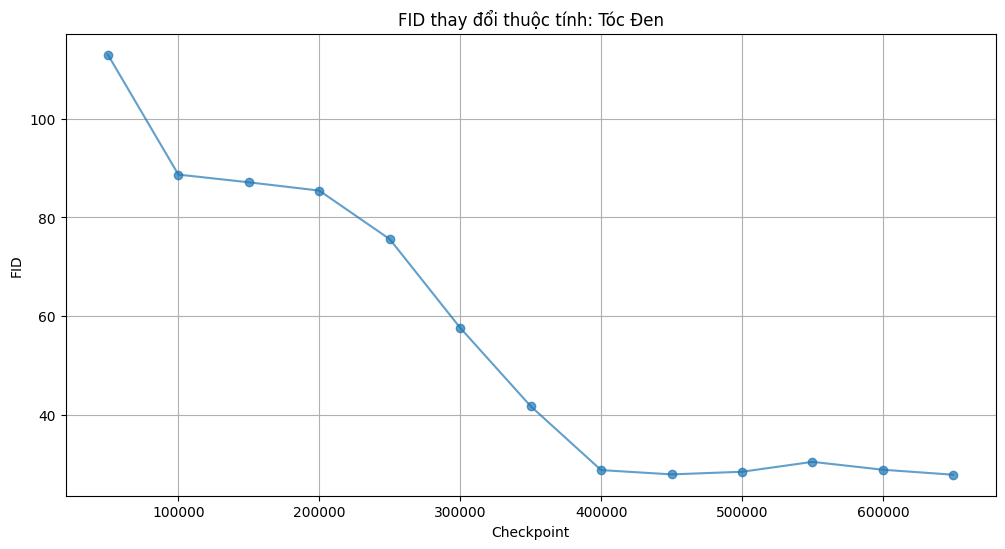

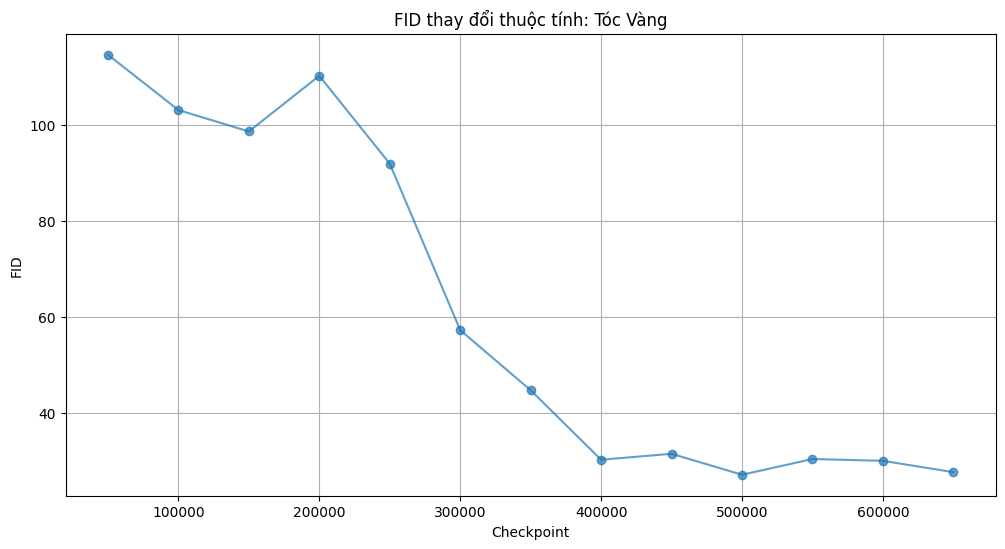

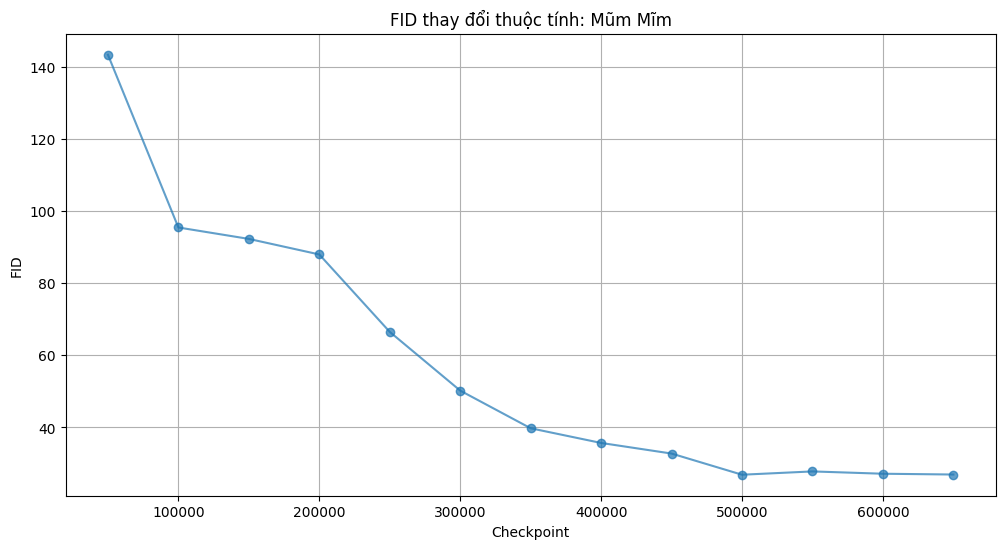

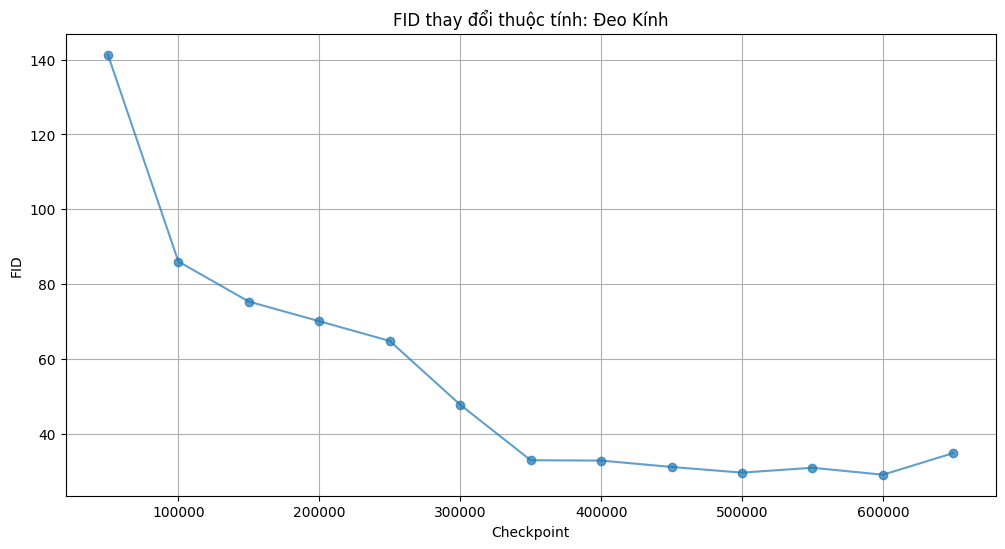

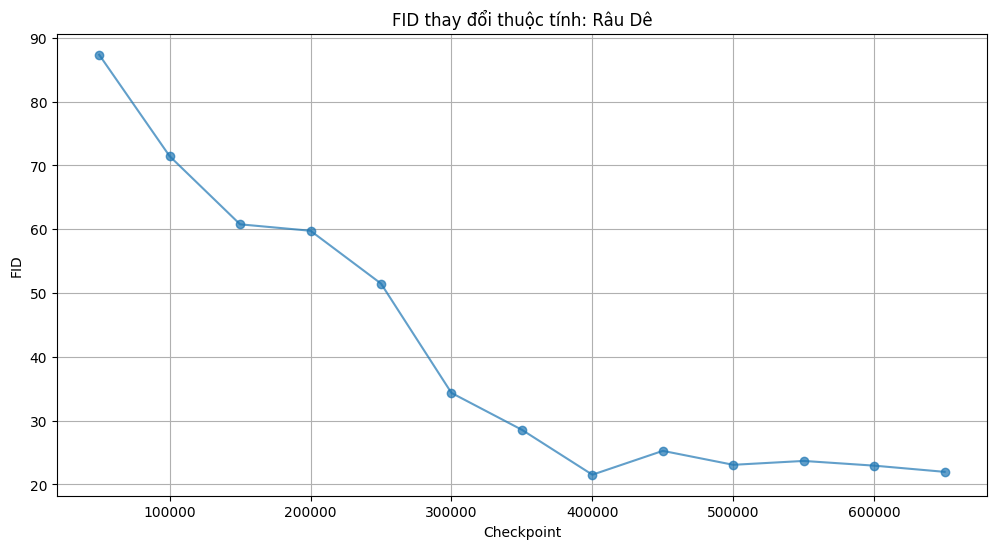

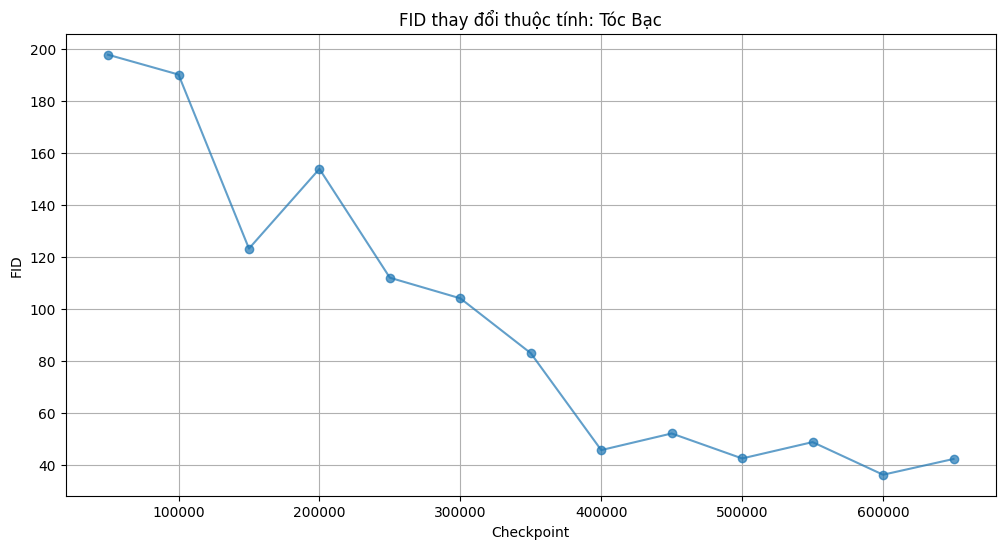

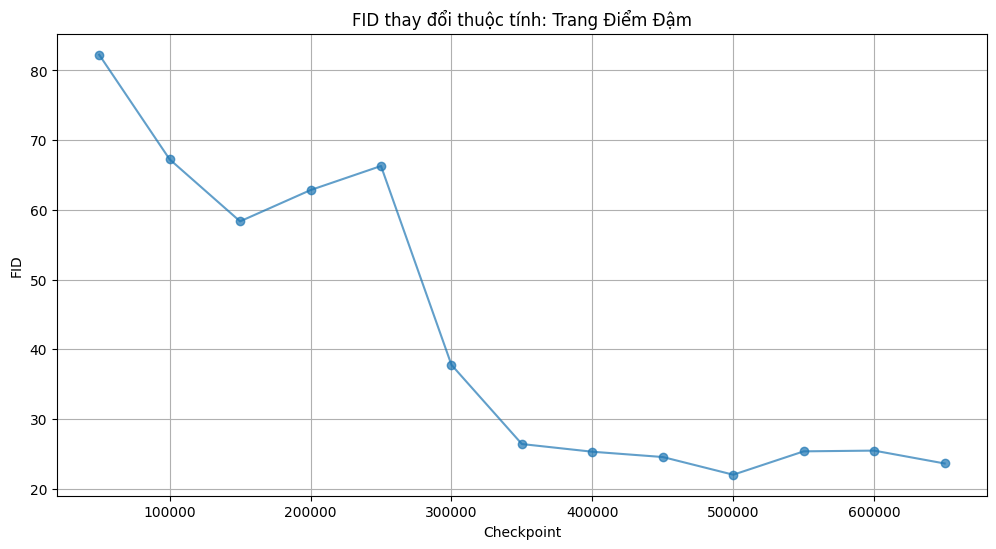

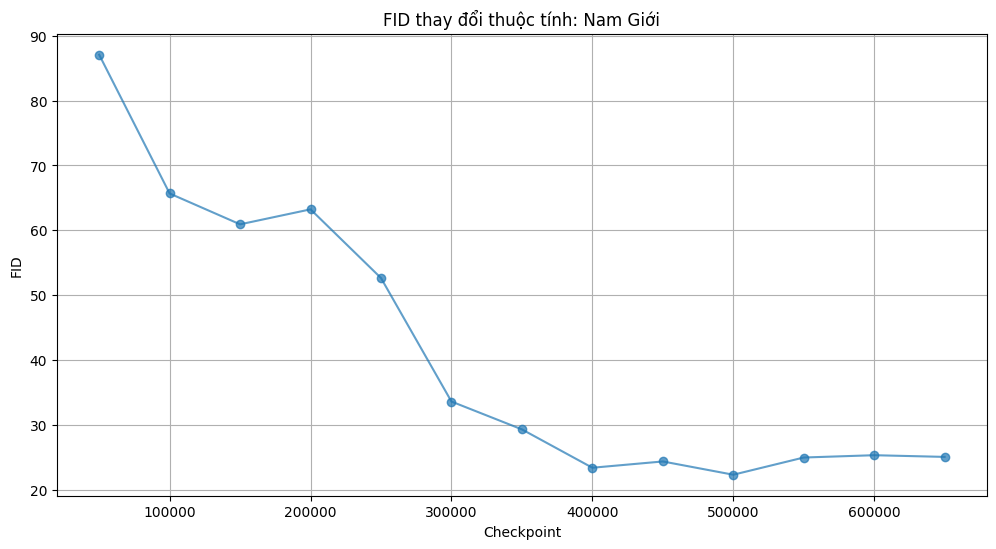

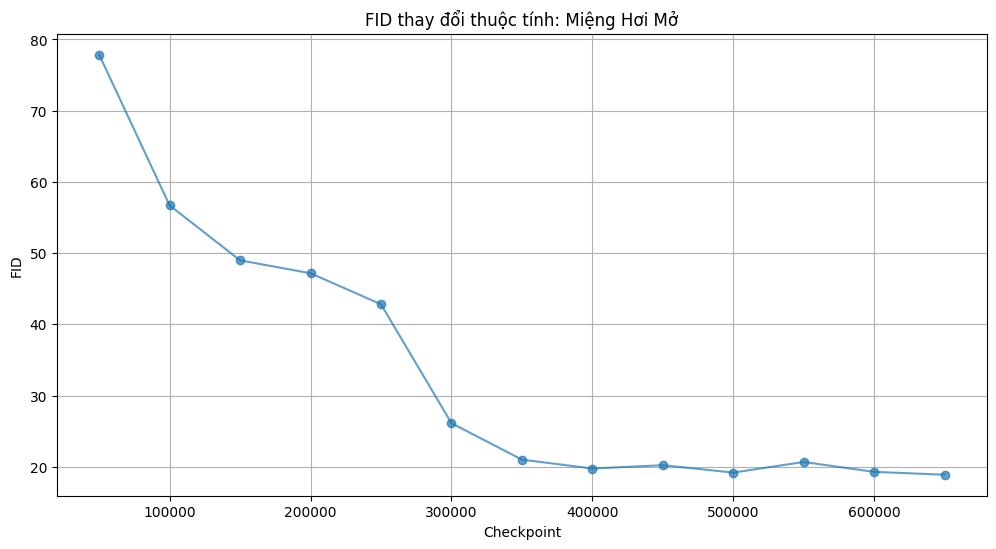

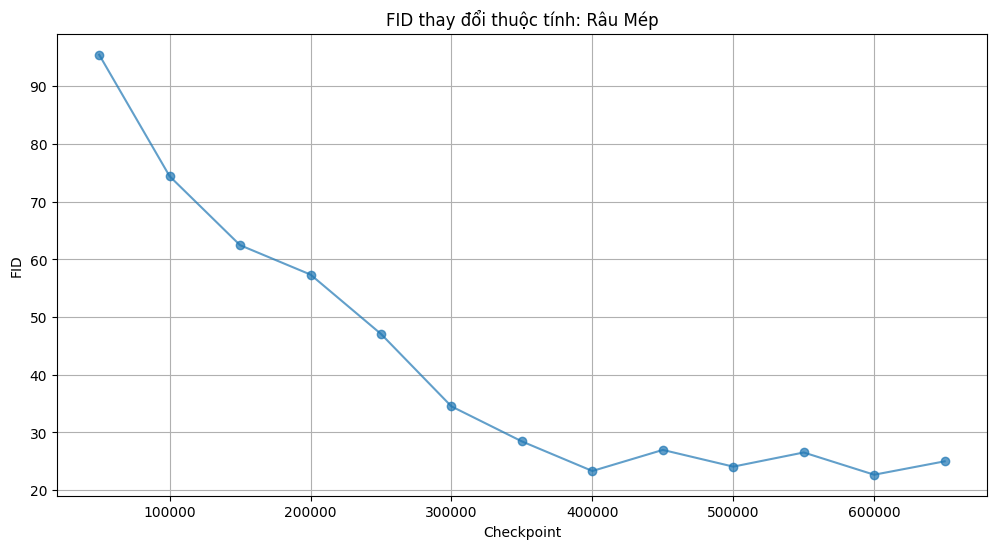

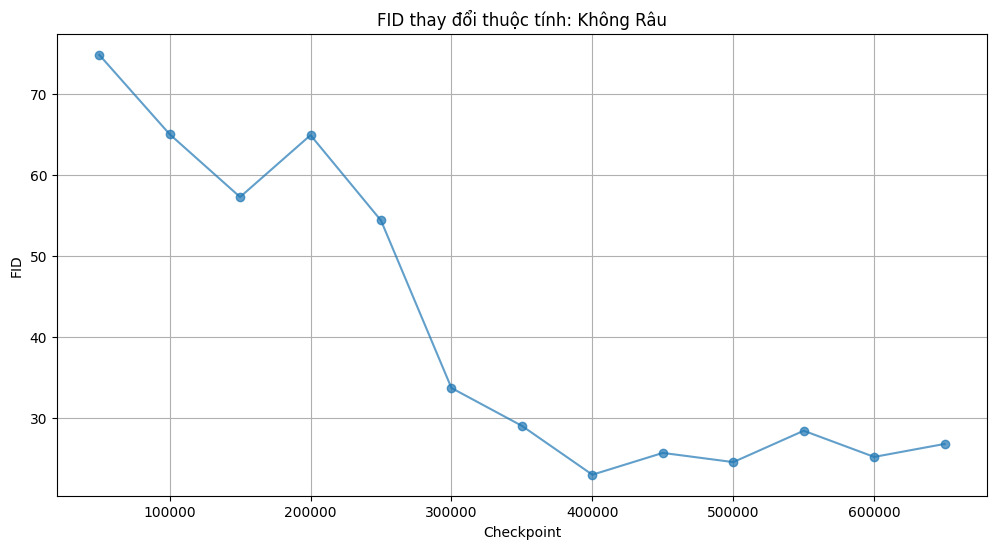

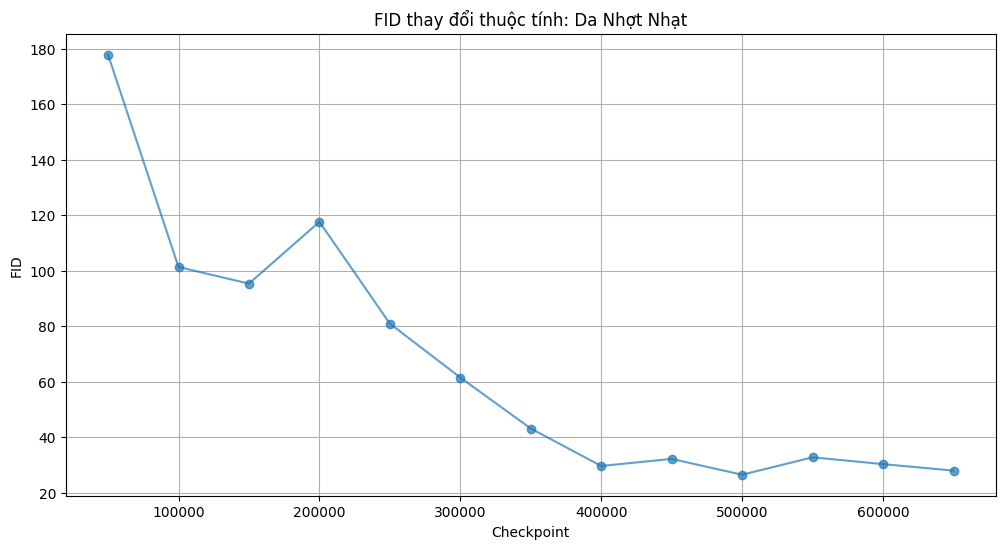

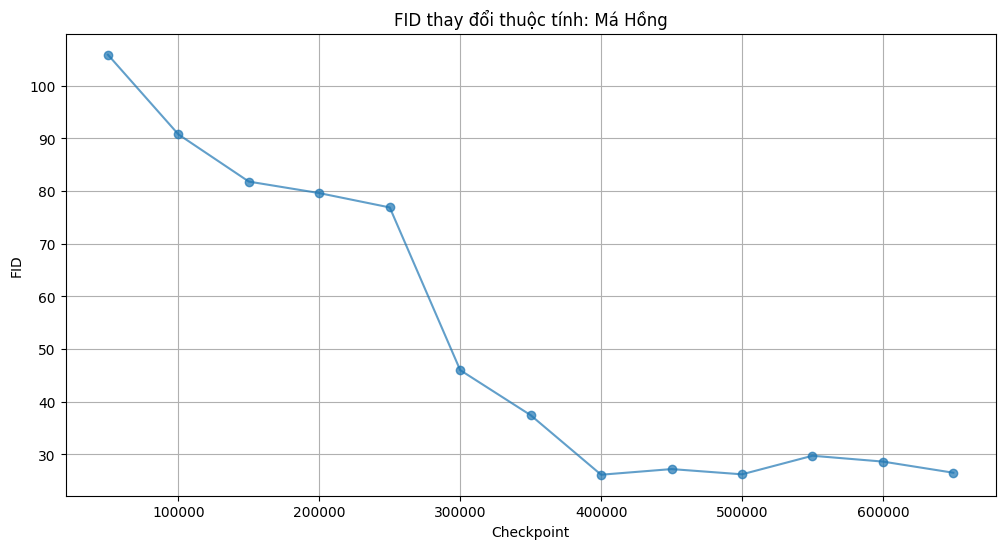

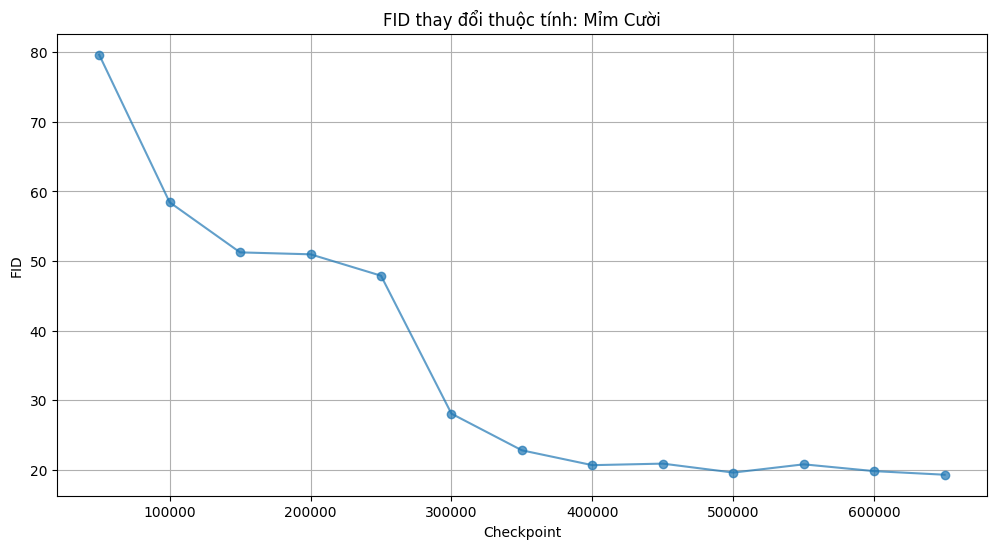

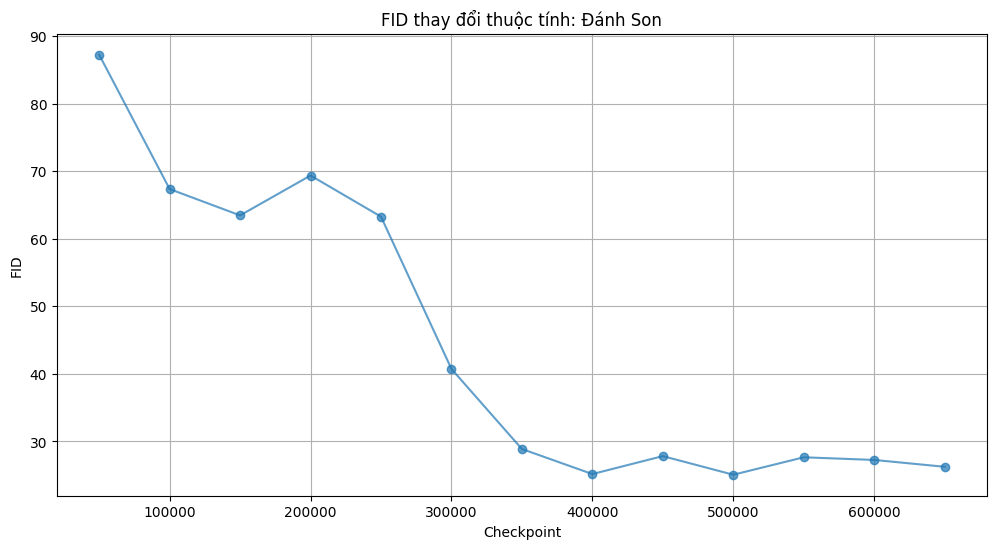

In [6]:
for i in range(17):
    fid_col = f"fid_{i+1}"
    name = criteria_names[i]

    plt.figure(figsize=(12, 6))
    plt.plot(df["checkpoint"], df[fid_col], marker='o', alpha=0.7)

    plt.title(f"FID thay đổi thuộc tính: {name}")
    plt.xlabel("Checkpoint")
    plt.ylabel("FID")
    plt.grid(True)
    plt.show()
